Trata-se de mais de um algoritmo de **classificação**, cujo objetivo é traçar uma ou mais retas que dividam de maneira aproximadamente quitativa **com margem máxima**, um conjunto de pontos de um espaço vetorial, que representam os dados do problema. Ele trabalha apenas com dados **linearmente separáveis**, o que pode eventualmente limitar sua aplicação.

A solução encontrada pelo SVM é estabelecer uma *margem de separação* entre os dois grupos de pontos **distintos** e **maximizar essa margem**, ou seja, a distância entre os pontos em destaque é a maior possível. Os **dois pontos mais próximos que pertencem a grupos diversos** são chamados de vetores de suporte. O algoritmo só precisa calcular a melhor reta para separar esses pontos, os demais estarão automaticamente agrupados.

In [1]:
#Suport Vector Machine SVM
#imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#load data
df = pd.read_csv('/kaggle/input/social/Social_Network_Ads.csv')
X = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values

#Divisão da amostra
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.25,
                                                   random_state = 3)
#padronização dos dados
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#Treinando o classificador sobre o conjunto de teste
algoritmo = SVC(kernel = 'linear', random_state = 3)
algoritmo.fit(X_train, y_train)


#Previsão dos rasultados
y_prev = algoritmo.predict(X_test)

#Gerando a matriz de confusão
cm = confusion_matrix(y_test, y_prev)
print(cm)

[[60  5]
 [10 25]]


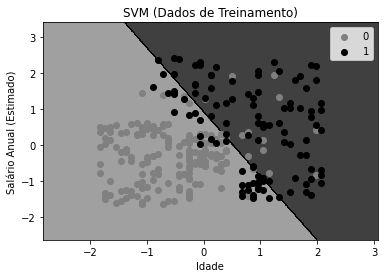

In [2]:
#Visualizando o resultado dos dados de treino
_X, _y = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = _X[:, 0].min() - 1, stop = _X[:, 0].max() + 1, step = 0.01),
                     np.arange(start = _X[:, 1].min() - 1, stop = _X[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, algoritmo.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
                                       alpha = 0.75, cmap = ListedColormap(('grey', 'black')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(_y)):
    plt.scatter(_X[_y == j, 0] ,_X[_y == j, 1],
        c = ListedColormap(('grey', 'black'))(i), label = j)

plt.title('SVM (Dados de Treinamento)')
plt.xlabel('Idade')
plt.ylabel('Salário Anual (Estimado)')
plt.legend()
plt.show()